<a href="https://colab.research.google.com/github/JANGJIGUN/next-netlify-starter/blob/main/Portfolio_Optimization_Algo_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization and Algorithmic Trading

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  20.473503
2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  20.508902
2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  20.182680
2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  20.145369
2010-01-08  30.285715  29.865715  30.042856  30.282858  111902700.0  20.279305
                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-12-13  172.570007  169.550003  170.490005  170.949997  31898600.0   
2018-12-14  169.080002  165.279999  169.000000  165.479996  40703700.0   
2018-12-17  168.350006  162.729996  165.449997  163.940002  44287900.0   
2018-12-18  167.529999  164.389999  165.380005  166.070007  33841500.0   
201

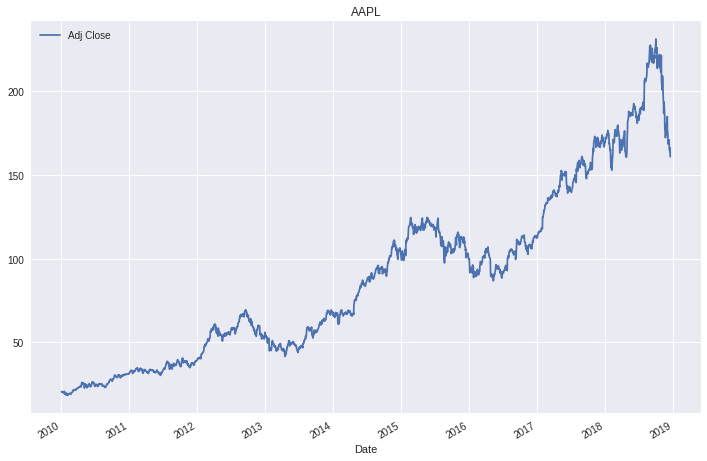

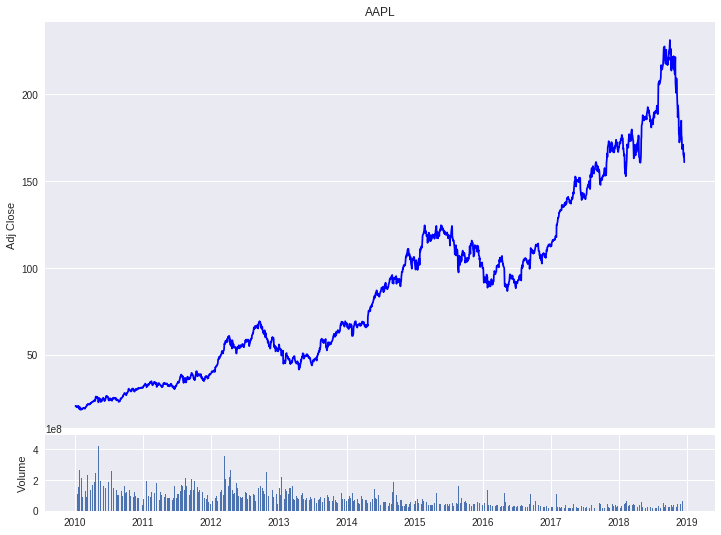

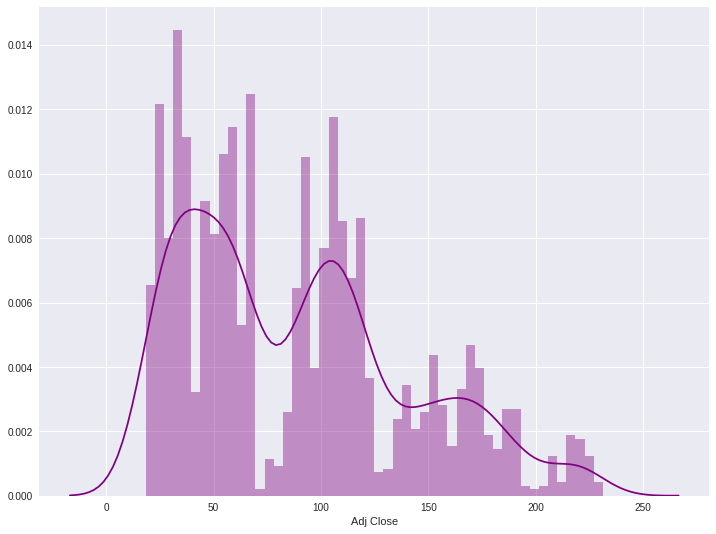

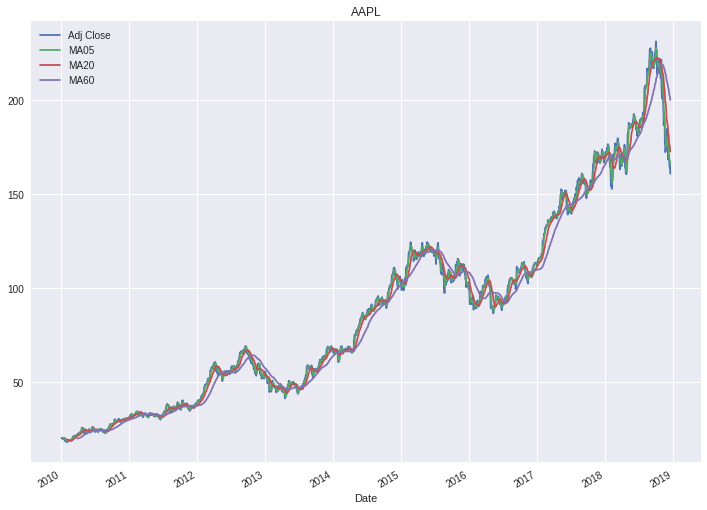

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-12-13  172.570007  169.550003  170.490005  170.949997  31898600.0   
2018-12-14  169.080002  165.279999  169.000000  165.479996  40703700.0   
2018-12-17  168.350006  162.729996  165.449997  163.940002  44287900.0   
2018-12-18  167.529999  164.389999  165.380005  166.070007  33841500.0   
2018-12-19  167.449997  159.089996  166.000000  160.889999  48889400.0   

             Adj Close        MA05        MA20        MA60  
Date                                                        
2018-12-13  170.949997  169.354004  177.729002  203.685002  
2018-12-14  165.479996  168.752002  176.663001  202.816157  
2018-12-17  163.940002  167.620001  175.289501  201.894075  
2018-12-18  166.070007  167.108002  173.916502  201.046855  
2018-12-19  160.889999  165.466000  172.668002  200.061316  


In [ ]:
! pip install pandas_datareader
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

#Read Stock Data from Yahoo Finance
end = dt.datetime.now()
#start = dt.datetime(end.year-2, end.month, end.day)
start = dt.datetime(2010, 1, 1)
df = web.DataReader("AAPL", 'yahoo', start, end)
df.to_csv('AAPL.csv')
df.from_csv('AAPL.csv')
print(df.head())
print(df.tail())
print(df.describe())

df['Adj Close'].plot(legend=True, figsize=(12, 8), title='AAPL', label='Adj Close')
plt.figure(figsize=(12,9))
top = plt.subplot2grid((12,9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12,9), (10,0), rowspan=2, colspan=9)
top.plot(df.index, df['Adj Close'], color='blue') #df.index gives the dates
bottom.bar(df.index, df['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('AAPL')
top.set_ylabel('Adj Close')
bottom.set_ylabel('Volume')

plt.figure(figsize=(12,9))
sns.distplot(df['Adj Close'].dropna(), bins=50, color='purple')

# simple moving averages
df['MA05'] = df['Adj Close'].rolling(5).mean() #5 days
df['MA20'] = df['Adj Close'].rolling(20).mean() #20 days
df['MA60'] = df['Adj Close'].rolling(60).mean() #60 days
df2 = pd.DataFrame({'Adj Close': df['Adj Close'],'MA05': df['MA05'],'MA20': df['MA20'], 'MA60': df['MA60']})
df2.plot(figsize=(12, 9), legend=True, title='AAPL')
df2.to_csv('AAPL_MA.csv')
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('AAPL_plot.png', dpi=300)
plt.show()
print(df.tail())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


                  High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-04  113.389999  111.510002  112.370003  113.330002  118944600.0   
2010-01-05  113.680000  112.849998  113.260002  113.629997  111579900.0   
2010-01-06  113.989998  113.430000  113.519997  113.709999  116074400.0   
2010-01-07  114.330002  113.180000  113.500000  114.190002  131091100.0   
2010-01-08  114.620003  113.660004  113.889999  114.570000  126402800.0   

            Adj Close  
Date                   
2010-01-04  95.097603  
2010-01-05  95.349350  
2010-01-06  95.416473  
2010-01-07  95.819267  
2010-01-08  96.138138  
                  High         Low        Open       Close       Volume  \
Date                                                                      
2018-12-13  267.489990  264.119995  266.519989  265.369995   96662700.0   
2018-12-14  264.029999  259.850006  262.959991  260.470001  116961100.0   
2018-1

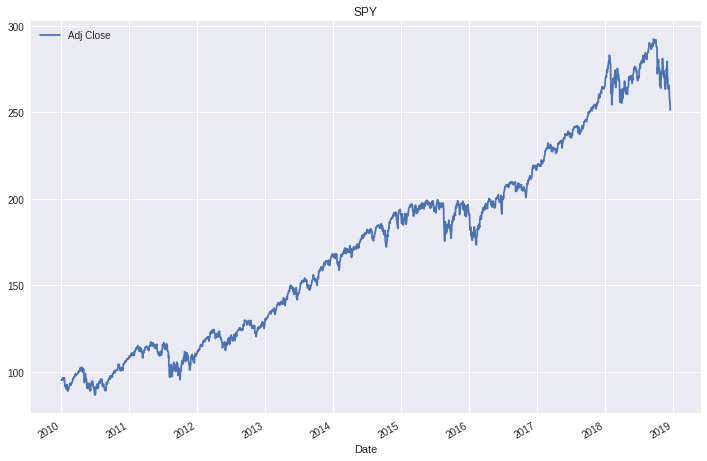

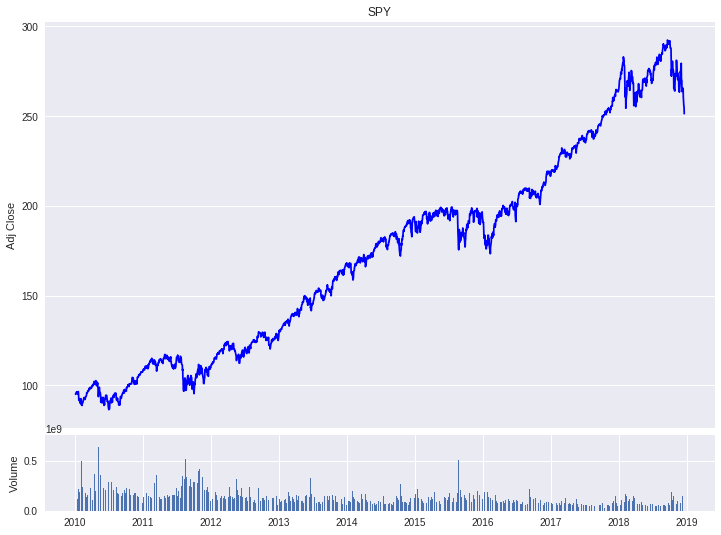

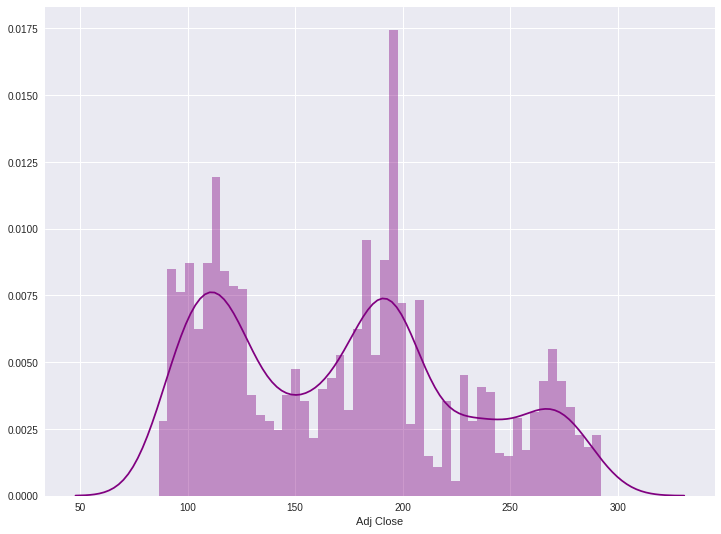

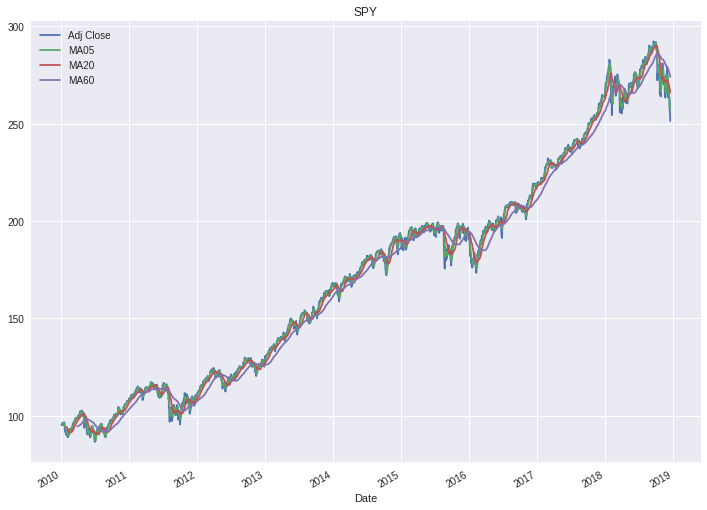

                  High         Low        Open       Close       Volume  \
Date                                                                      
2018-12-13  267.489990  264.119995  266.519989  265.369995   96662700.0   
2018-12-14  264.029999  259.850006  262.959991  260.470001  116961100.0   
2018-12-17  260.649994  253.529999  259.399994  255.360001  165492300.0   
2018-12-18  257.950012  253.279999  257.200012  255.080002  134515100.0   
2018-12-19  259.399994  249.350006  255.169998  251.259995  214594800.0   

             Adj Close        MA05        MA20        MA60  
Date                                                        
2018-12-13  265.369995  264.520001  269.026999  276.316411  
2018-12-14  260.470001  263.900000  268.540498  275.825783  
2018-12-17  255.360001  262.157999  267.657499  275.210833  
2018-12-18  255.080002  260.347998  266.724998  274.595667  
2018-12-19  251.259995  257.507999  265.832998  273.933000  


In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

#Read Stock Data from Yahoo Finance
end = dt.datetime.now()
#start = dt.datetime(end.year-2, end.month, end.day)
start = dt.datetime(2010, 1, 1)
df = web.DataReader("SPY", 'yahoo', start, end)
df.to_csv('SPY.csv')
df.from_csv('SPY.csv')
print(df.head())
print(df.tail())
print(df.describe())

df['Adj Close'].plot(legend=True, figsize=(12, 8), title='SPY', label='Adj Close')
plt.figure(figsize=(12,9))
top = plt.subplot2grid((12,9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12,9), (10,0), rowspan=2, colspan=9)
top.plot(df.index, df['Adj Close'], color='blue') #df.index gives the dates
bottom.bar(df.index, df['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('SPY')
top.set_ylabel('Adj Close')
bottom.set_ylabel('Volume')

plt.figure(figsize=(12,9))
sns.distplot(df['Adj Close'].dropna(), bins=50, color='purple')

# simple moving averages
df['MA05'] = df['Adj Close'].rolling(5).mean() #5 days
df['MA20'] = df['Adj Close'].rolling(20).mean() #20 days
df['MA60'] = df['Adj Close'].rolling(60).mean() #60 days
df2 = pd.DataFrame({'Adj Close': df['Adj Close'],'MA05': df['MA05'],'MA20': df['MA20'], 'MA60': df['MA60']})
df2.plot(figsize=(12, 9), legend=True, title='SPY')
df2.to_csv('SPY_MA.csv')
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('SPY_plot.png', dpi=300)
plt.show()
print(df.tail())

#Investment Portfolio Optimisation with Python
Source: http://www.pythonforfinance.net/2017/01/21/investment-portfolio-optimisation-with-python/

In [ ]:
#!pip install pandas_datareader
import pandas_datareader.data as web
import numpy as np
import pandas as pd
 
stock = ['AAPL']
data = web.DataReader(stock, data_source='yahoo', start='2010-01-01', end='2017-12-31')['Adj Close']
data.sort_index(inplace=True)
returns = data.pct_change()
mean_return = returns.mean()
return_stdev = returns.std()
 
annualised_return = round(mean_return * 252, 4)
annualised_stdev = round(return_stdev * np.sqrt(252), 4)

print('mean_return:', round(mean_return[0], 6))
print('return_stdev:', round(return_stdev[0], 6))
print('stock:', stock[0])
print('The annualised mean return: ', annualised_return[0])
print('The annualised volatility: ', annualised_stdev[0])

mean_return: 0.001172
return_stdev: 0.016074
stock: AAPL
The annualised mean return:  0.2954
The annualised volatility:  0.2552


In [ ]:
#list of stocks in portfolio
#NOTE THAT THESE MUST BE ENTERED IN ALPHABETICAL ORDER FOR THE RESULTS TO BE CORRECT!!!
stocks = ['AAPL','AMZN', 'GOOG', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2010-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set array holding portfolio weights of each stock
weights = np.asarray([0.5, 0.2, 0.2, 0.1])

#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('portfolio_return: ', portfolio_return)
print('portfolio_std_dev: ', portfolio_std_dev)


portfolio_return:  0.3
portfolio_std_dev:  0.21


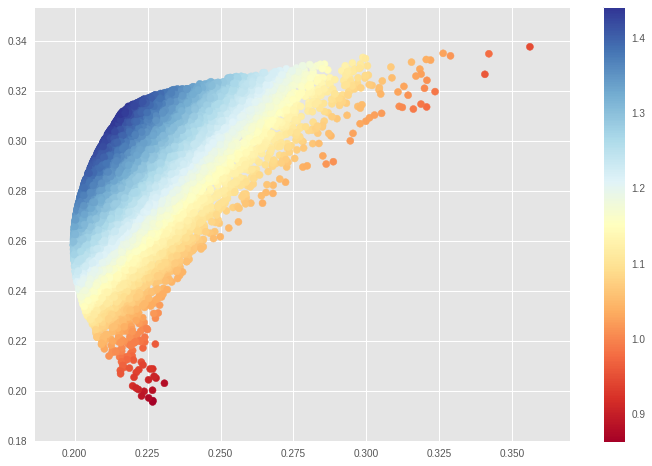

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AAPL','AMZN', 'GOOG', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2010-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,8))
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
plt.colorbar()

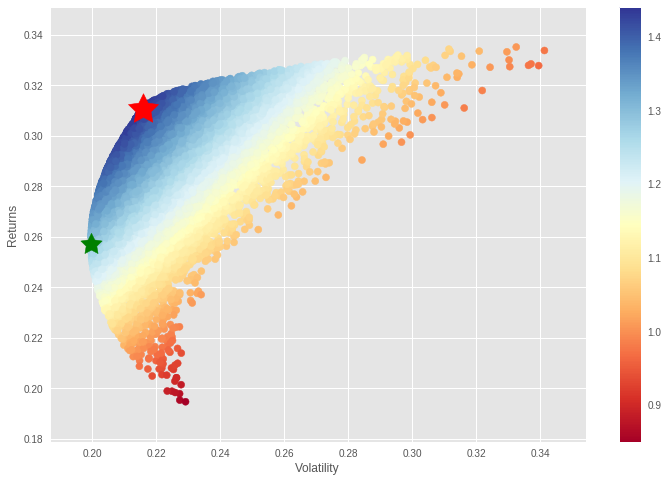

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AAPL','AMZN', 'GOOG', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2010-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

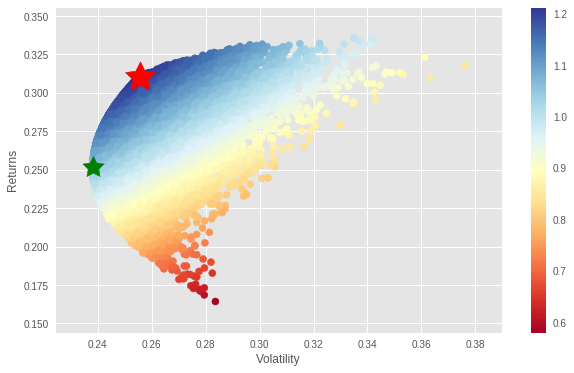

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AAPL','AMZN', 'GOOGL', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2008-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

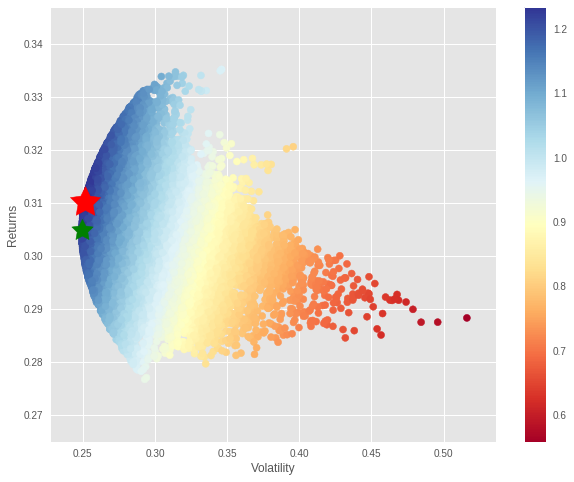

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AAPL','AMZN', 'GOOGL', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2000-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(10,8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

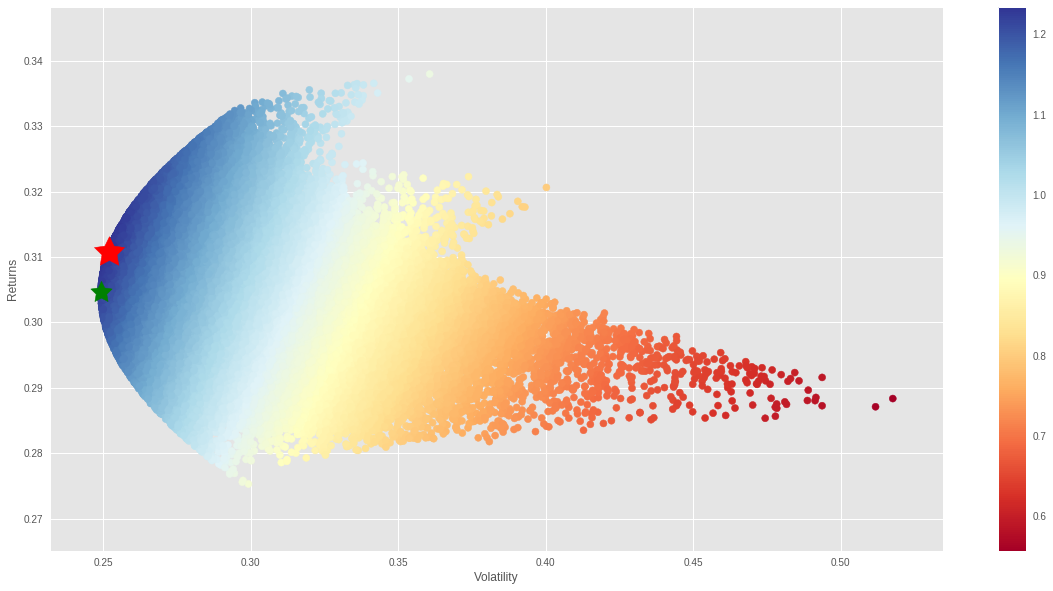

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AAPL','AMZN', 'GOOG', 'FB']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='2000-01-01', end='2017-12-31')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 100000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(20,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

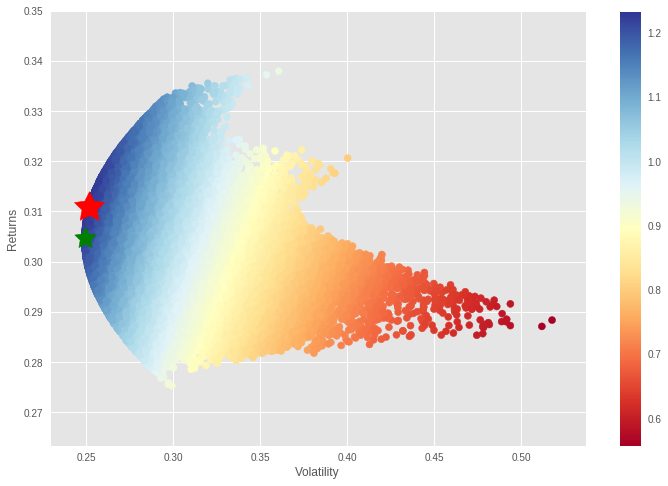

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

In [ ]:
print(max_sharpe_port)

ret       0.310818
stdev     0.251932
sharpe    1.233737
AAPL      0.228531
AMZN      0.025464
GOOG      0.390103
FB        0.355902
Name: 42667, dtype: float64


In [ ]:
print(min_vol_port)

ret       0.304664
stdev     0.249319
sharpe    1.221984
AAPL      0.187503
AMZN      0.040091
GOOG      0.322985
FB        0.449421
Name: 94778, dtype: float64


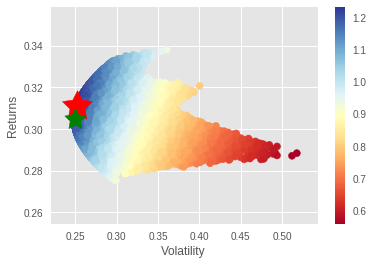

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

# Efficient Frontier Portfolio Optimisation in Python
Source: 
https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
https://github.com/tthustla/efficient_frontier/blob/master/Efficient%20_Frontier_implementation.ipynb

In [ ]:
! pip install quandl

In [ ]:
#! pip install quandl
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#GET YOUR QUANDL API KEY from https://www.quandl.com/account/profile
quandl.ApiConfig.api_key = 'dA7mtrRmEAxGHzVZFxy9' #'YOUR_QUANDL_API_KEY' 
stocks = ['AAPL','AMZN','GOOGL','FB']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
data.to_csv('stocks_data.csv')
print(data.head())
print(data.tail())

           date ticker  adj_close
None                             
0    2017-12-29  GOOGL    1053.40
1    2017-12-28  GOOGL    1055.95
2    2017-12-27  GOOGL    1060.20
3    2017-12-26  GOOGL    1065.85
4    2017-12-22  GOOGL    1068.86
           date ticker   adj_close
None                              
2001 2016-01-08   AAPL   93.677776
2002 2016-01-07   AAPL   93.185040
2003 2016-01-06   AAPL   97.291172
2004 2016-01-05   AAPL   99.233131
2005 2016-01-04   AAPL  101.783763


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 3 columns):
date         2006 non-null datetime64[ns]
ticker       2006 non-null object
adj_close    2006 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 47.1+ KB


In [ ]:
df = data.set_index('date')
table = df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,AMZN,FB,GOOGL
date,,,,
2016-01-04,101.783763,636.99,102.22,759.44
2016-01-05,99.233131,633.79,102.73,761.53
2016-01-06,97.291172,632.65,102.97,759.33
2016-01-07,93.185040,607.94,97.92,741.00
2016-01-08,93.677776,607.05,97.33,730.91


Text(0,0.5,'price in $')

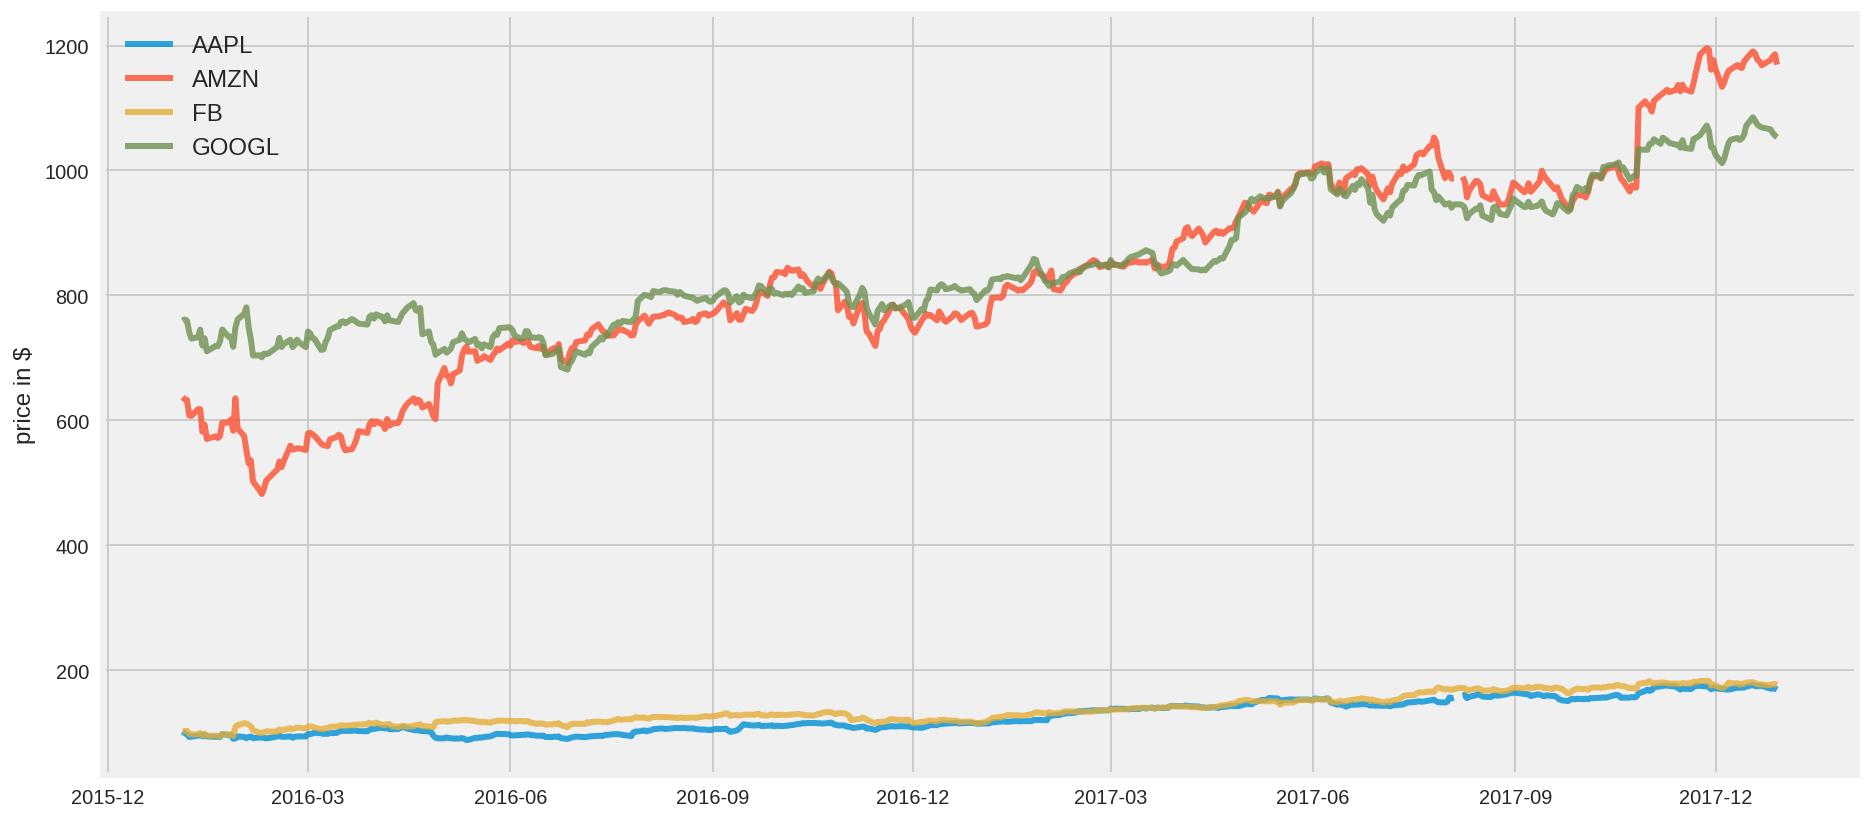

In [ ]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0,0.5,'daily returns')

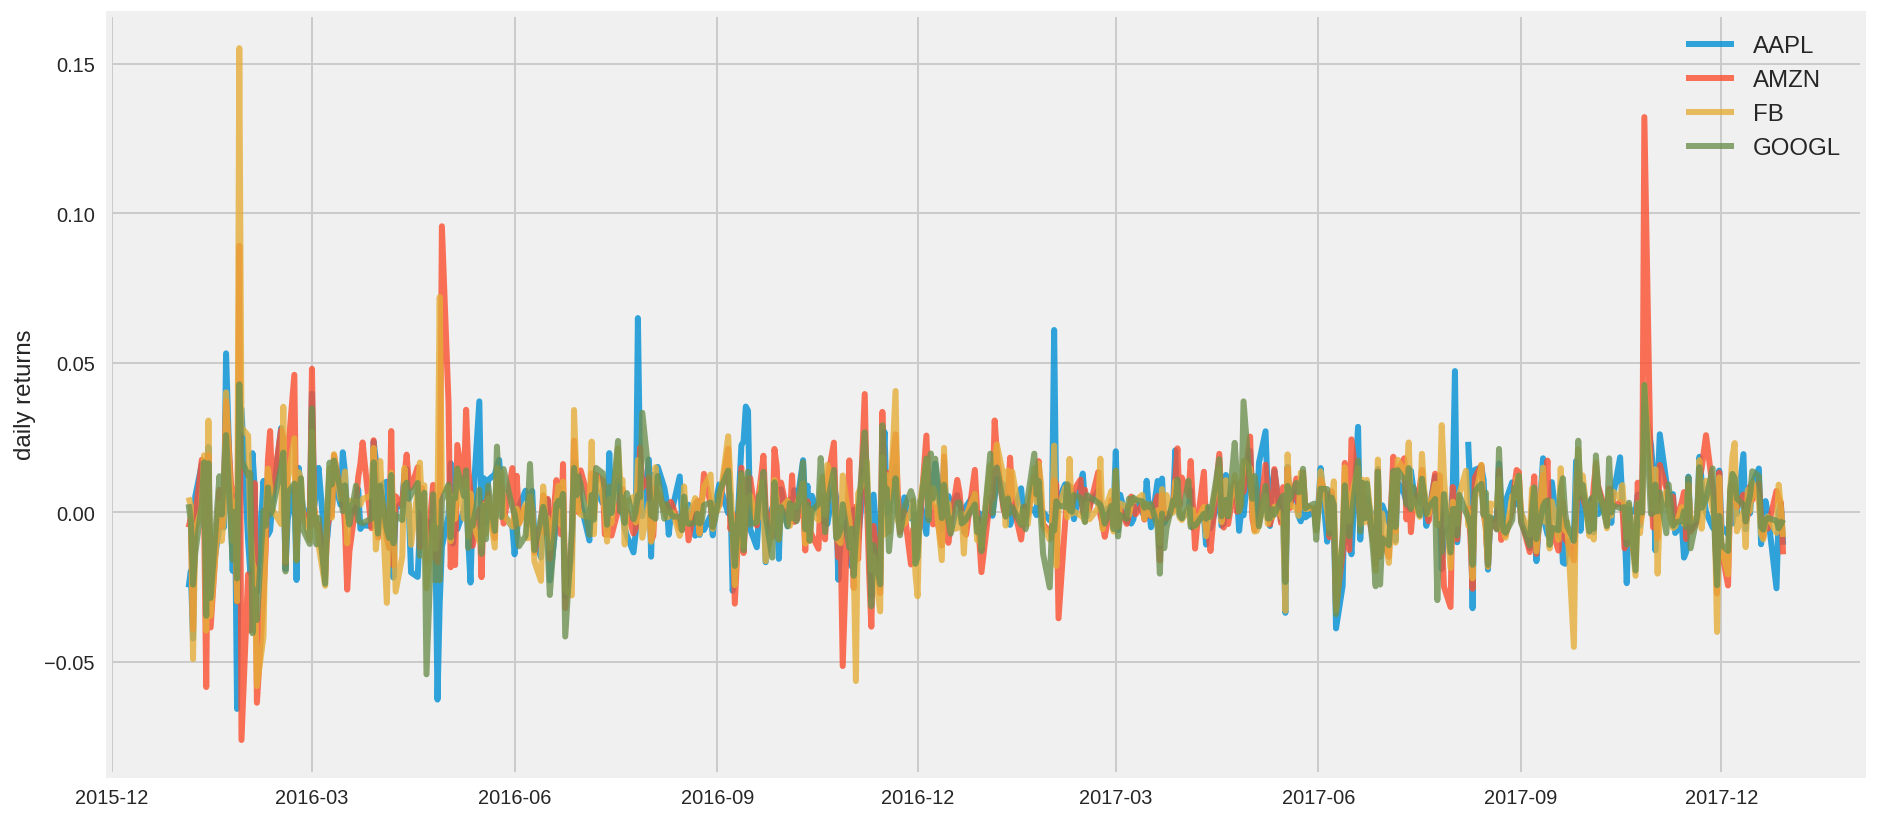

In [ ]:
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


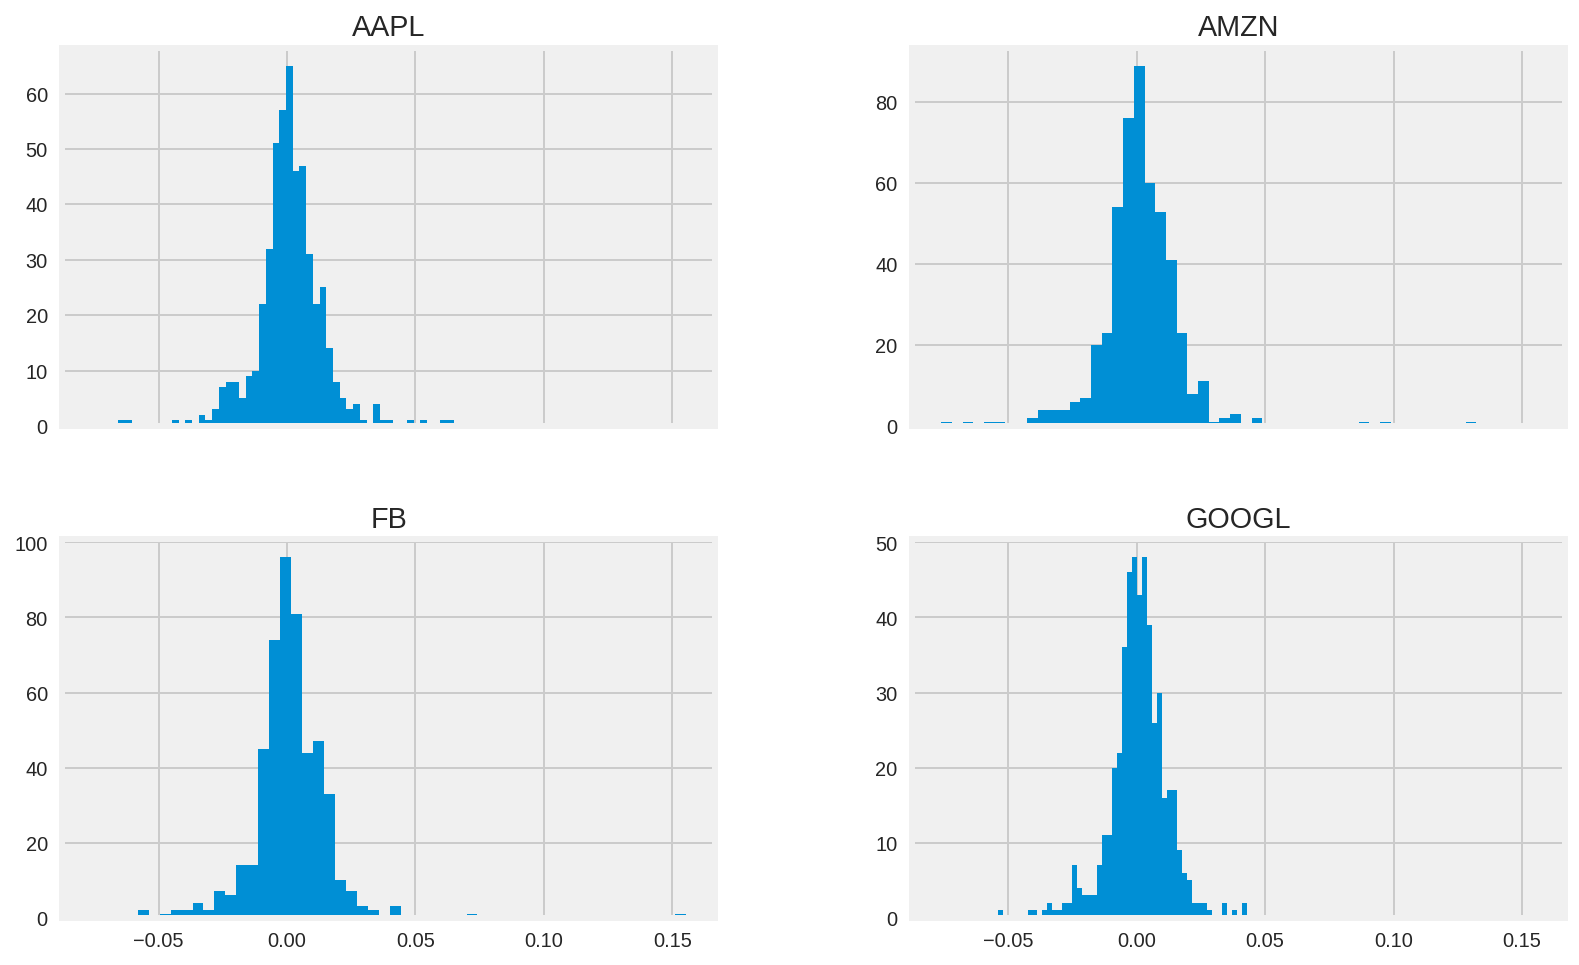

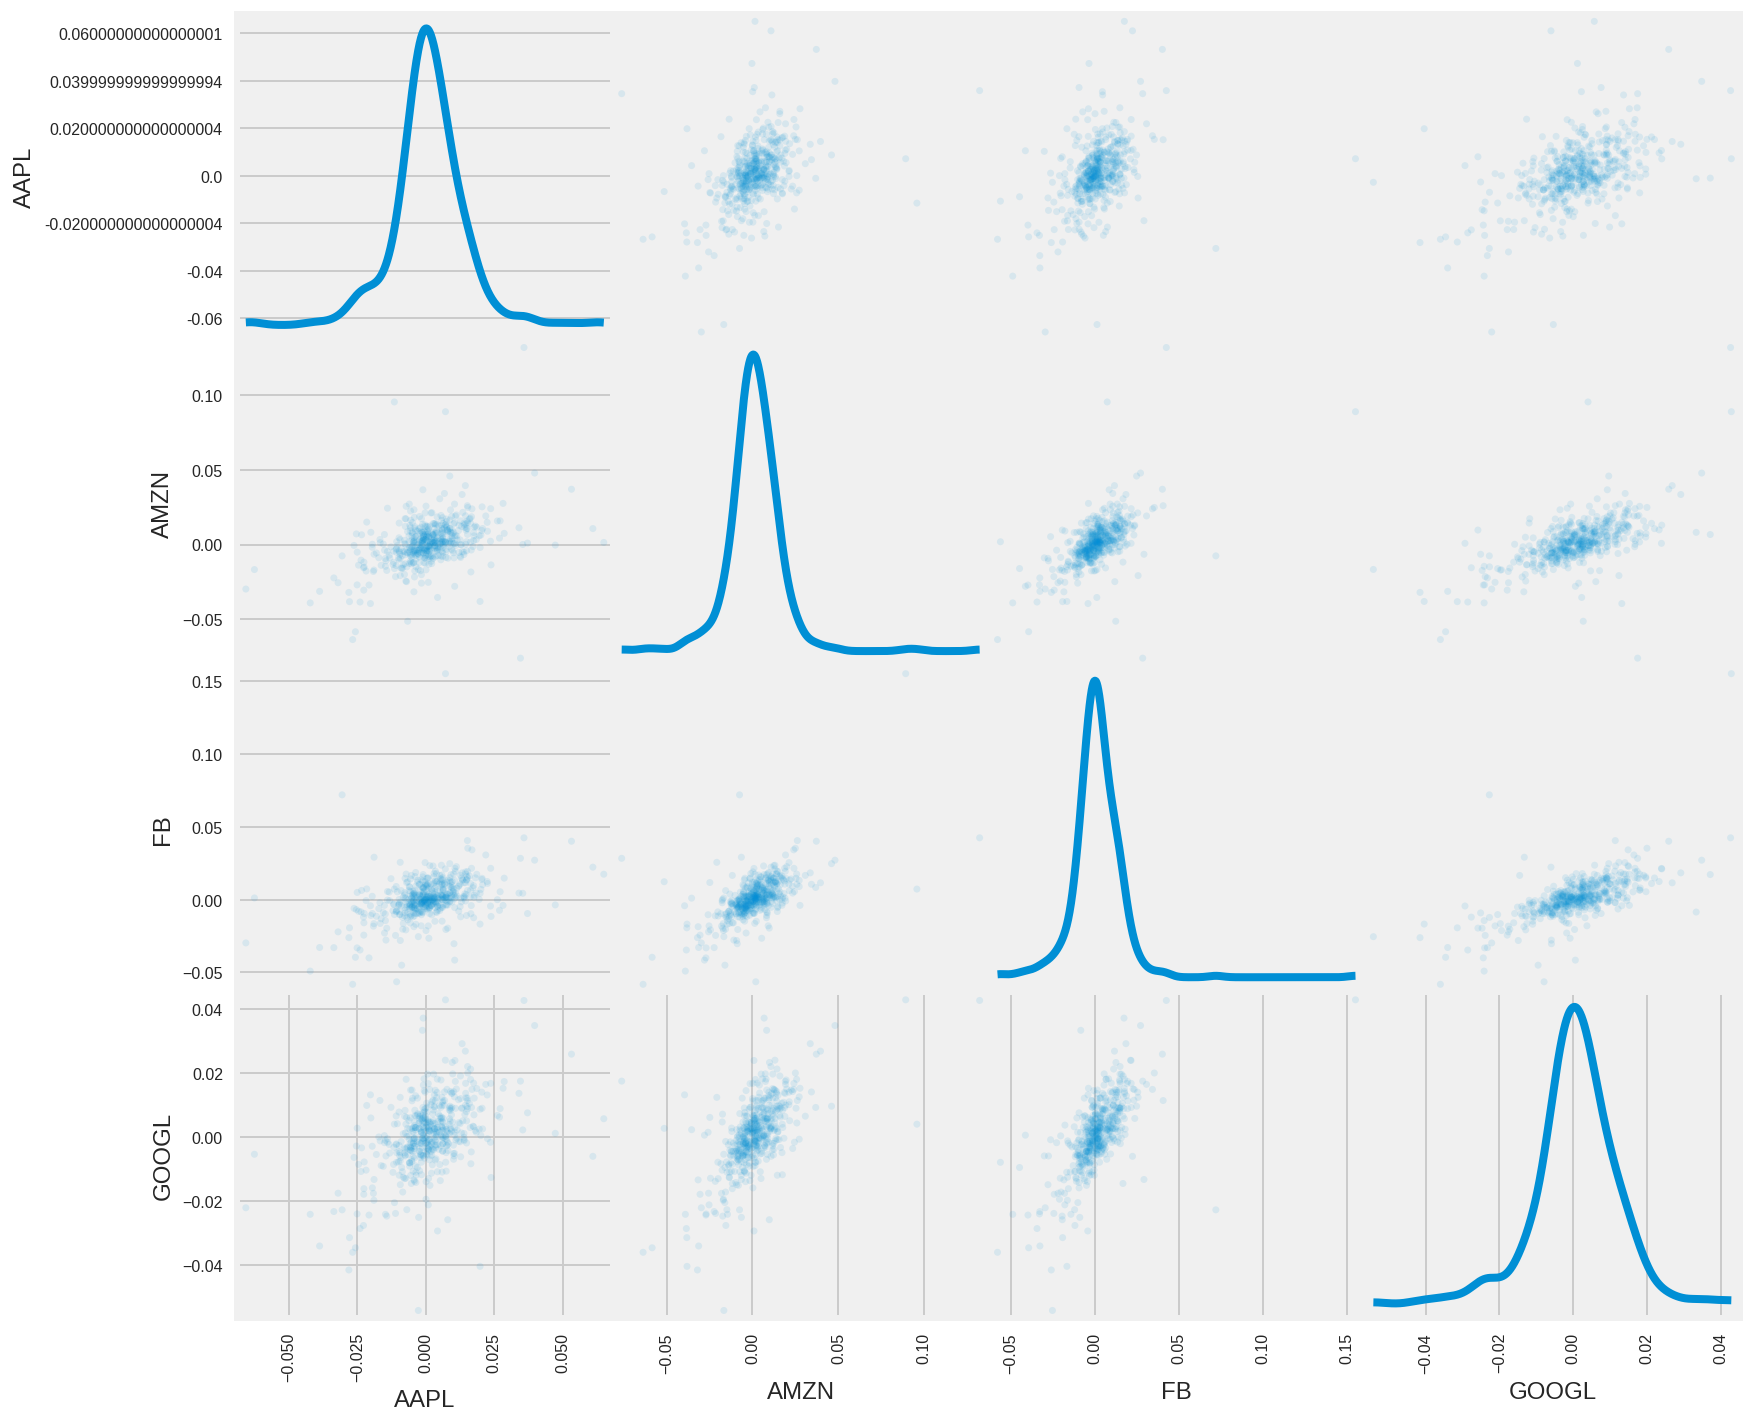

In [ ]:
returns.hist(bins=50, sharex=True, figsize=(12,8))
pd.scatter_matrix(returns, diagonal='kde', alpha=0.1,figsize=(12,12))

plt.show()

           AAPL      AMZN        FB     GOOGL
AAPL   1.000000  0.412631  0.409847  0.487958
AMZN   0.412631  1.000000  0.604482  0.617829
FB     0.409847  0.604482  1.000000  0.655233
GOOGL  0.487958  0.617829  0.655233  1.000000


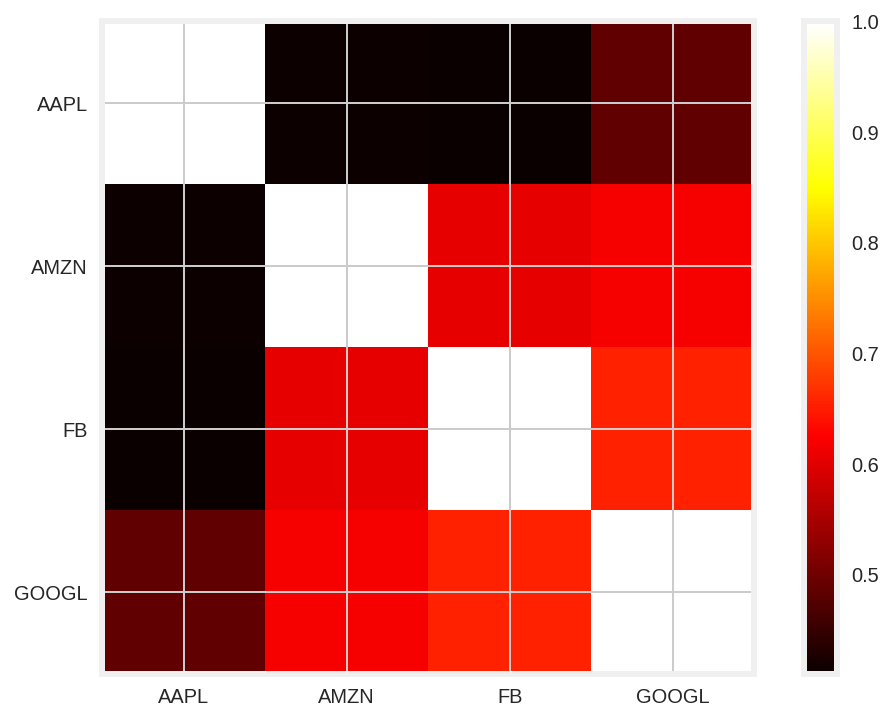

In [ ]:
corr = returns.corr()
print(corr)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)
plt.show()

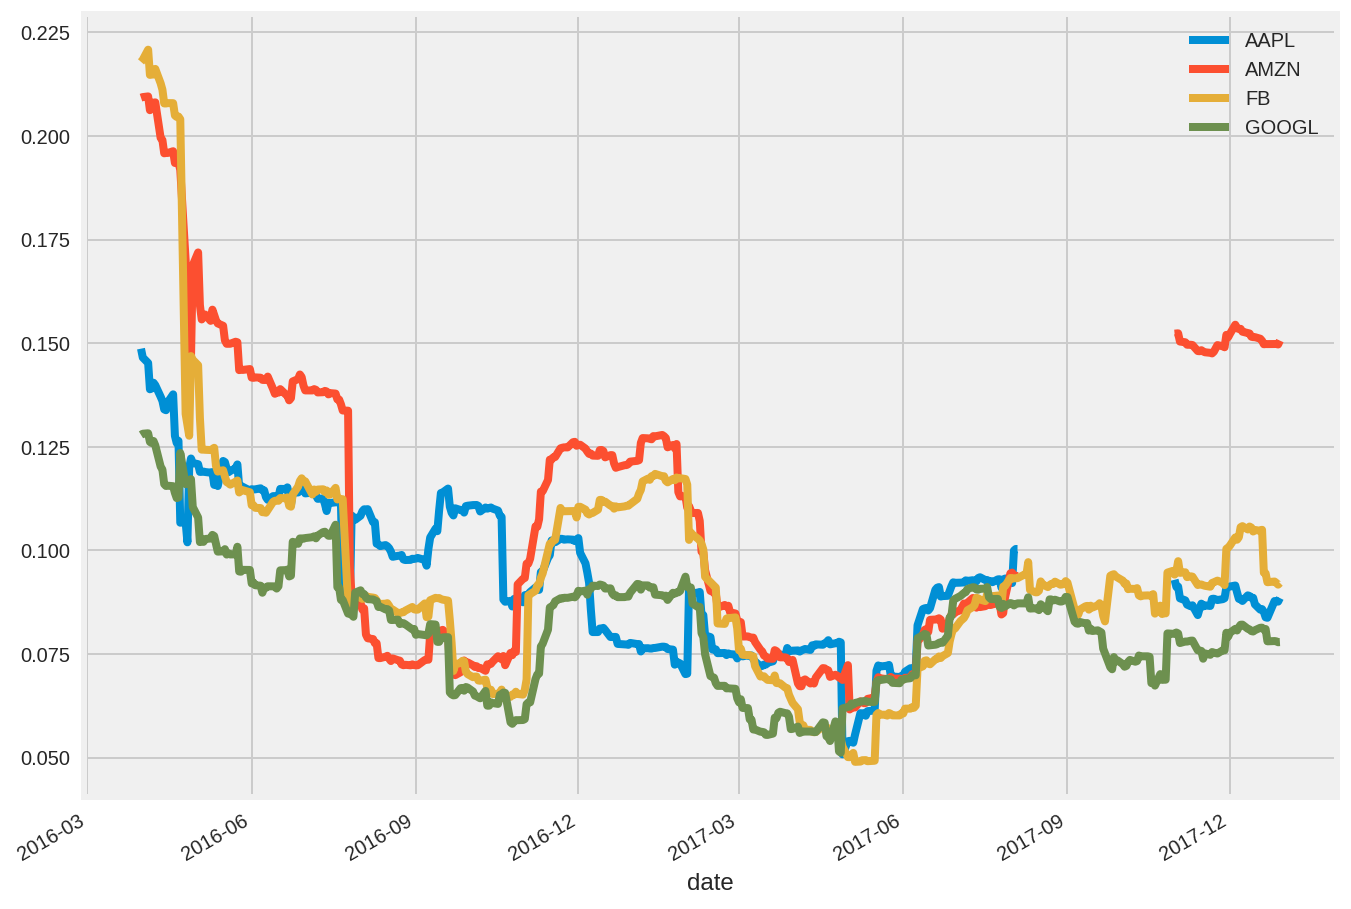

In [ ]:
# Calculate the volatility
min_periods = 60 
volatility = returns.rolling(min_periods).std() * np.sqrt(min_periods) 
# Plot the volatility
volatility.plot(figsize=(10, 8))

plt.show()

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [ ]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  43.93  29.49  26.51   0.07
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN    FB  GOOGL
allocation  34.12  0.04  8.25  57.59


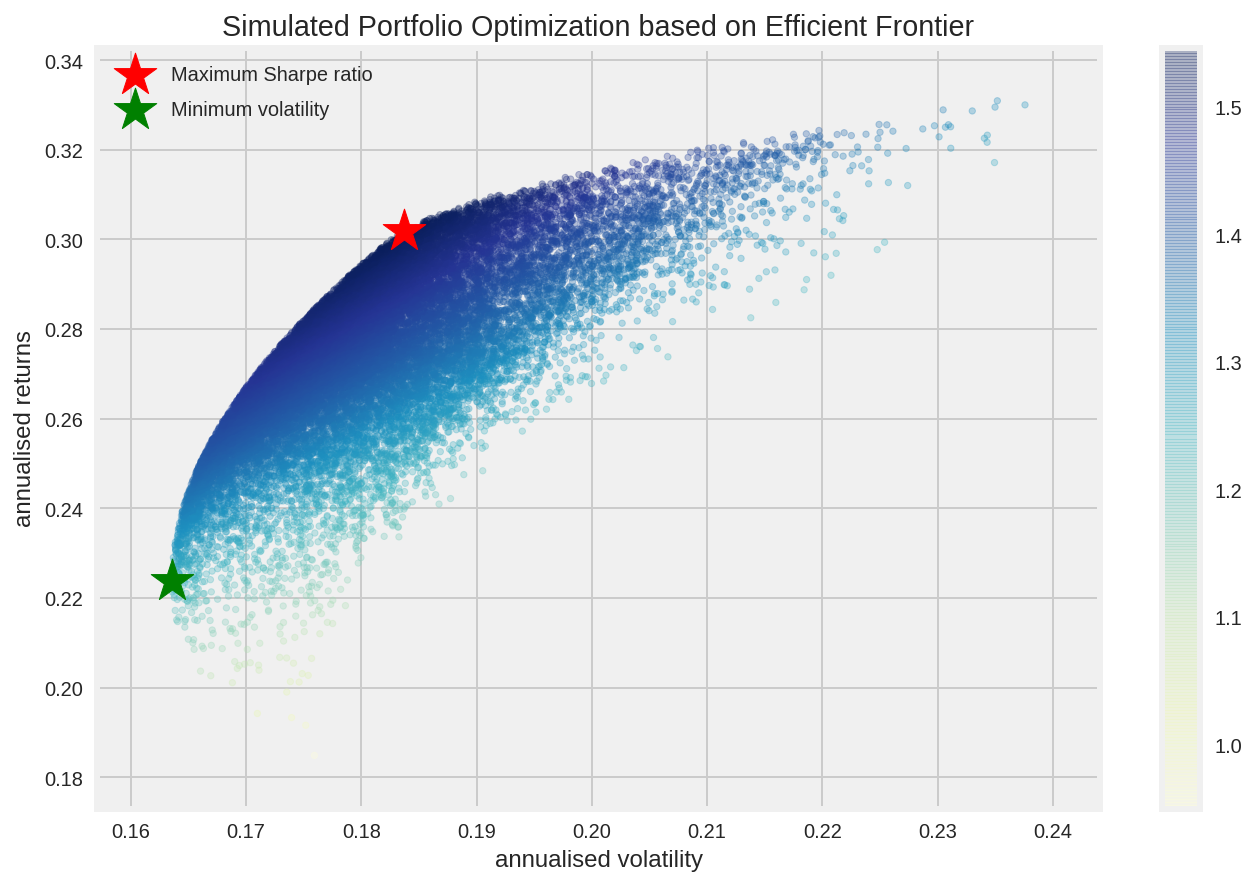

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
constraints = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result


In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  44.72  29.13  26.15    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN   FB  GOOGL
allocation  33.94  0.66  7.0   58.4


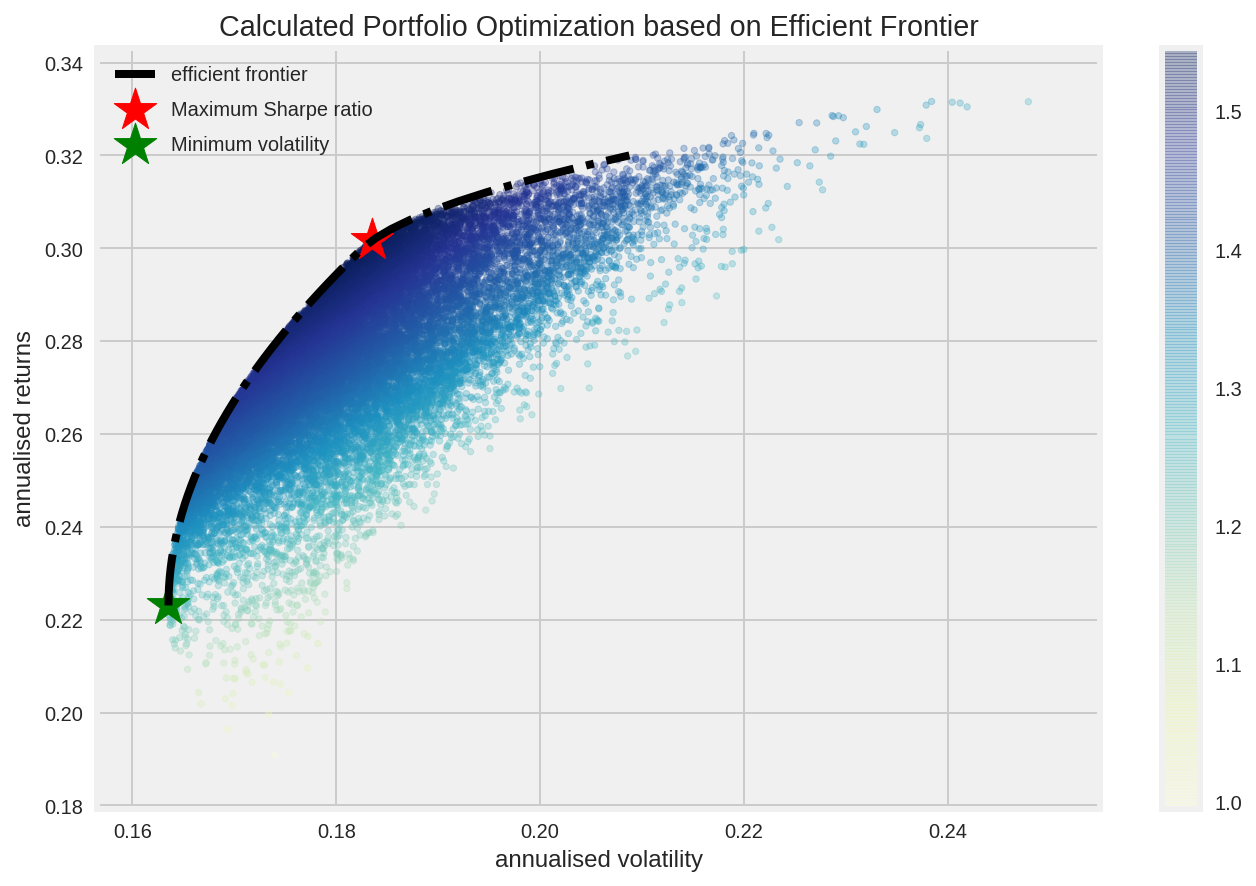

In [ ]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  44.72  29.13  26.15    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN   FB  GOOGL
allocation  33.94  0.66  7.0   58.4
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.28 , annualised volatility: 0.21
AMZN : annuaised return 0.34 , annualised volatility: 0.25
FB : annuaised return 0.3 , annualised volatility: 0.23
GOOGL : annuaised return 0.18 , annualised volatility: 0.18
--------------------------------------------------------------------------------


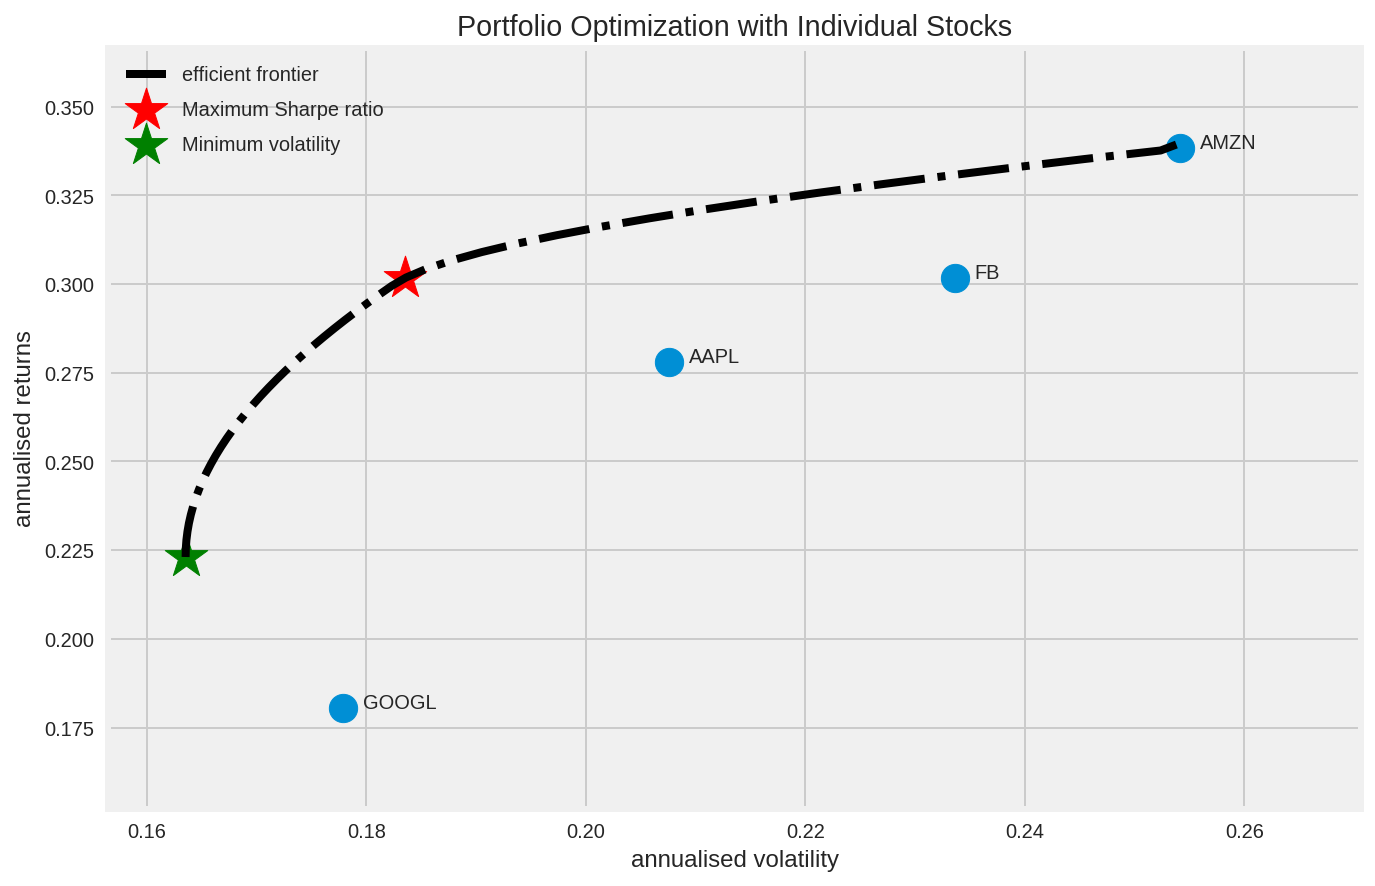

In [ ]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

#Investment Portfolio Optimization
Source: http://www.bradfordlynch.com/blog/2015/12/04/InvestmentPortfolioOptimization.html

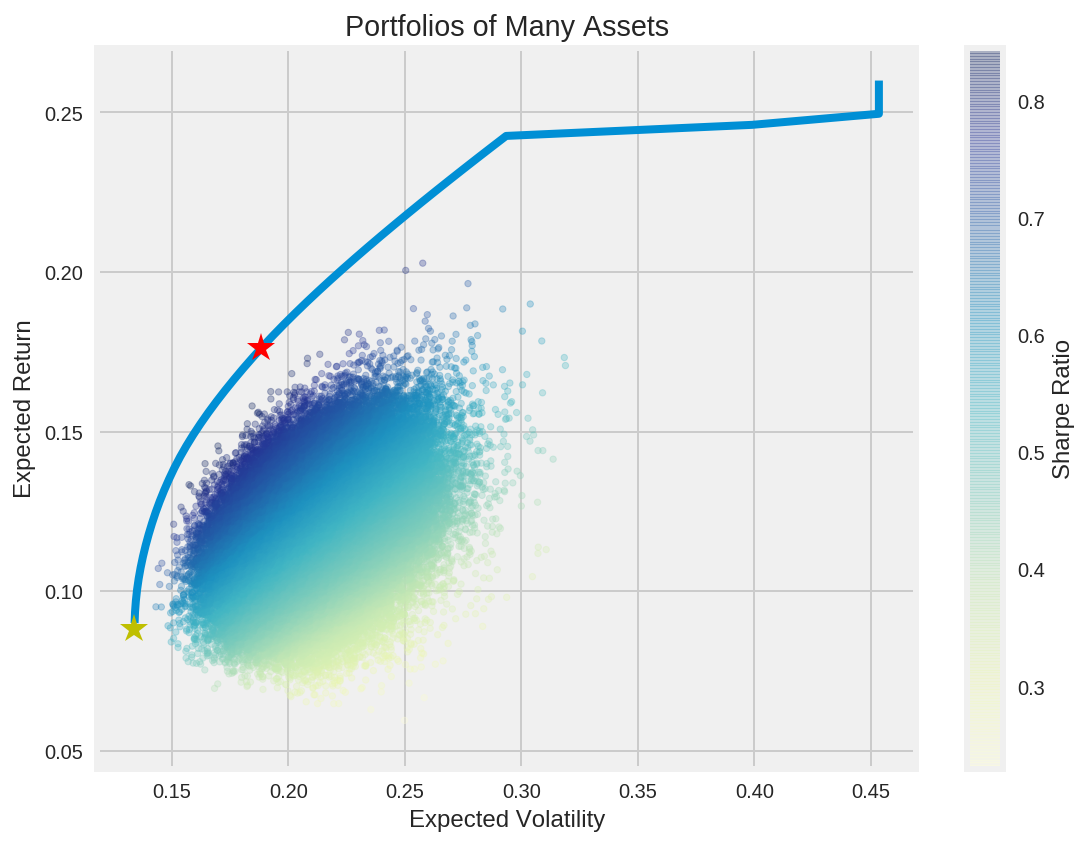

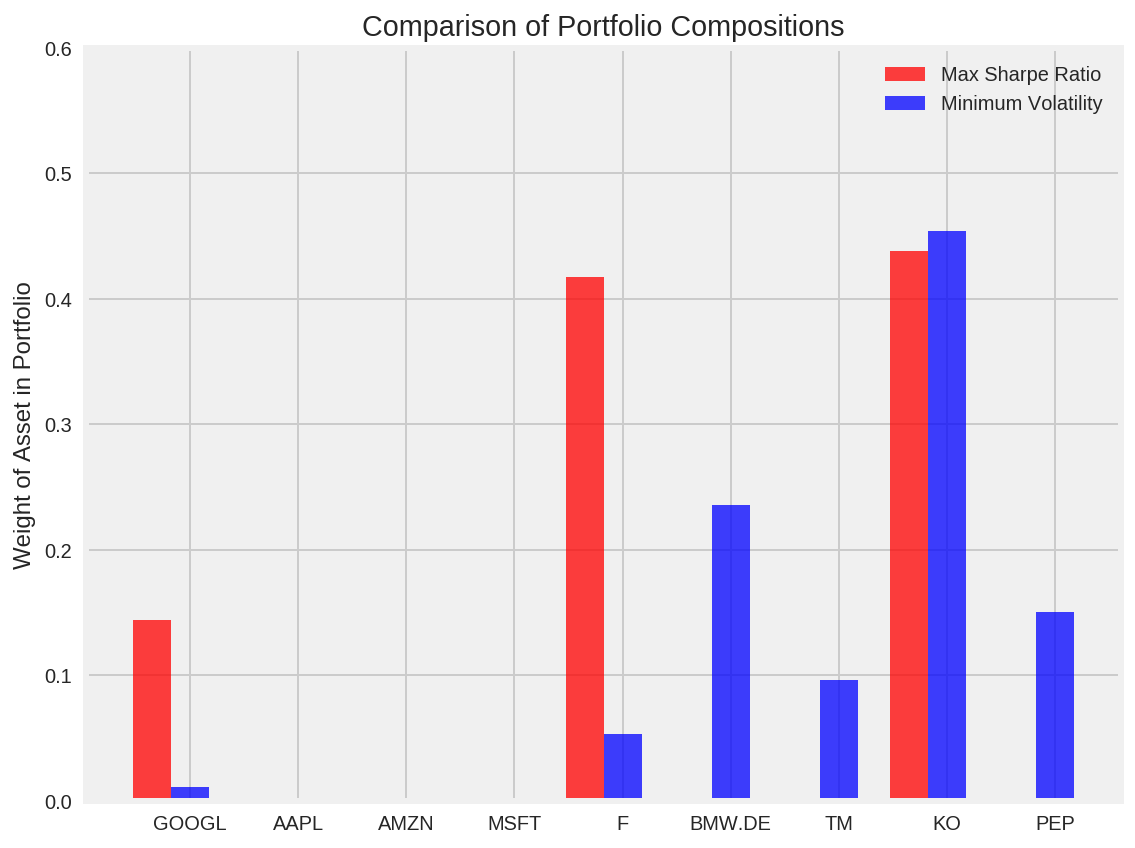

In [ ]:
#Source: https://github.com/bradfordlynch/rossMiscCodes/blob/master/Portfolio%20Optimization/Portfolio%20Optimization.py
################################################################################
#Tools for analyzing portfolios
#Bradford Lynch, 2015, Ann Arbor, MI
################################################################################
import matplotlib.pyplot as plt
import pandas as pd
#import pandas.io.data as web
import pandas_datareader.data as web

import numpy as np
import scipy.optimize as sco

def getStockQuotes(symbols, source, startDate, endDate):
    quotes = pd.DataFrame()
    for symbol in symbols:
        #import pandas_datareader.data as web
        #stocks = ['AAPL', 'AMZN', 'FB', 'MSFT']
        #data = web.DataReader(stocks, data_source='yahoo', start='2000-01-01', end='2017-12-31')['Adj Close']
        quotes[symbol] = web.DataReader(symbol, data_source=source, start=startDate, end=endDate)['Adj Close']
    return quotes
    
def calcPortfolioPerf(weights, meanReturns, covMatrix):
    '''
    Calculates the expected mean of returns and volatility for a portolio of 
    assets, each carrying the weight specified by weights
    
    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    
    OUTPUT
    tuple containing the portfolio return and volatility
    '''    
    #Calculate return and variance
    portReturn = np.sum( meanReturns*weights )
    portStdDev = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))
    
    return portReturn, portStdDev
    
def negSharpeRatio(weights, meanReturns, covMatrix, riskFreeRate):
    '''
    Returns the negated Sharpe Ratio for the speicified portfolio of assets
    
    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    riskFreeRate: time value of money
    '''
    p_ret, p_var = calcPortfolioPerf(weights, meanReturns, covMatrix)
    
    return -(p_ret - riskFreeRate) / p_var
    
def getPortfolioVol(weights, meanReturns, covMatrix):
    '''
    Returns the volatility of the specified portfolio of assets
    
    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    
    OUTPUT
    The portfolio's volatility
    '''
    return calcPortfolioPerf(weights, meanReturns, covMatrix)[1]
    
def findMaxSharpeRatioPortfolio(meanReturns, covMatrix, riskFreeRate):
    '''
    Finds the portfolio of assets providing the maximum Sharpe Ratio
    
    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    riskFreeRate: time value of money
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple( (0,1) for asset in range(numAssets))
    
    opts = sco.minimize(negSharpeRatio, numAssets*[1./numAssets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return opts
    
def findMinVariancePortfolio(meanReturns, covMatrix):
    '''
    Finds the portfolio of assets providing the lowest volatility
    
    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple( (0,1) for asset in range(numAssets))
    
    opts = sco.minimize(getPortfolioVol, numAssets*[1./numAssets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return opts
    
def findEfficientReturn(meanReturns, covMatrix, targetReturn):
    '''
    Finds the portfolio of assets providing the target return with lowest
    volatility
    
    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    targetReturn: APR of target expected return
    
    OUTPUT
    Dictionary of results from optimization
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    
    def getPortfolioReturn(weights):
        return calcPortfolioPerf(weights, meanReturns, covMatrix)[0]
    
    constraints = ({'type': 'eq', 'fun': lambda x: getPortfolioReturn(x) - targetReturn},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(numAssets))
    
    return sco.minimize(getPortfolioVol, numAssets*[1./numAssets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
def findEfficientFrontier(meanReturns, covMatrix, rangeOfReturns):
    '''
    Finds the set of portfolios comprising the efficient frontier
    
    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    targetReturn: APR of target expected return
    
    OUTPUT
    Dictionary of results from optimization
    '''
    efficientPortfolios = []
    for ret in rangeOfReturns:
        efficientPortfolios.append(findEfficientReturn(meanReturns, covMatrix, ret))
        
    return efficientPortfolios
    

availStocks = ['GOOGL', 'AAPL', 'AMZN', 'MSFT', 'F', 'BMW.DE', 'TM', 'KO', 'PEP']
stocks = availStocks
#stocks = ['GOOGL', 'TM', 'KO', 'PEP']
#stocks = [availStocks[i] for i in np.random.random_integers(0,len(availStocks)-1, 3)]
numAssets = len(stocks)
source = 'yahoo'
start = '2010-01-01'
end = '2017-12-31'

#Retrieve data from online
#data = getStockQuotes(stocks, source, start, end)

#Load data from disk
#data = pd.read_hdf('./stockData.h5', 'quotes').select(lambda x: x in stocks, 1)
#stocks = ['AAPL', 'AMZN', 'FB', 'MSFT']
data = web.DataReader(stocks, data_source='yahoo', start='2000-01-01', end='2017-12-31')['Adj Close']

#Calculate returns
riskFreeRate = 0.0021
dur = 20
numPeriodsAnnually = 252.0/dur
windowedData = data[::dur]
rets = np.log(windowedData/windowedData.shift(1))

#Calculate stock mean-variance
meanDailyReturn = rets.mean()
covariance = rets.cov()

#Run MC simulation of numPortfolios portfolios
numPortfolios = 100000
results = np.zeros((3,numPortfolios))

#Calculate portfolios
for i in range(numPortfolios):
    #Draw numAssets random numbers and normalize them to be the portfolio weights
    weights = np.random.random(numAssets)
    weights /= np.sum(weights)
    
    #Calculate expected return and volatility of portfolio
    pret, pvar = calcPortfolioPerf(weights, meanDailyReturn, covariance)
    
    #Convert results to annual basis, calculate Sharpe Ratio, and store them
    results[0,i] = pret*numPeriodsAnnually
    results[1,i] = pvar*np.sqrt(numPeriodsAnnually)
    results[2,i] = (results[0,i] - riskFreeRate)/results[1,i]
    

#Create a new figure
plt.figure(figsize=(8,6))

#Plot results of MC on portfolio weights
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o', s=10, alpha=0.3)

#Find efficient frontier, annual target returns of 9% and 16% are converted to
#match period of mean returns calculated previously
targetReturns = np.linspace(0.09, 0.26, 50)/(252./dur)
efficientPortfolios = findEfficientFrontier(meanDailyReturn, covariance, targetReturns)
plt.plot([p['fun']*np.sqrt(numPeriodsAnnually) for p in efficientPortfolios], targetReturns*numPeriodsAnnually, marker='x')

#Find portfolio with maximum Sharpe ratio
maxSharpe = findMaxSharpeRatioPortfolio(meanDailyReturn, covariance, riskFreeRate)
rp, sdp = calcPortfolioPerf(maxSharpe['x'], meanDailyReturn, covariance)
plt.plot(sdp*np.sqrt(numPeriodsAnnually), rp*numPeriodsAnnually, 'r*', markersize=15.0)

#Find portfolio with minimum variance
minVar = findMinVariancePortfolio(meanDailyReturn, covariance)
rp, sdp = calcPortfolioPerf(minVar['x'], meanDailyReturn, covariance)
plt.plot(sdp*np.sqrt(numPeriodsAnnually), rp*numPeriodsAnnually, 'y*', markersize=15.0)
    
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolios of Many Assets')
plt.tight_layout()
plt.savefig('Monte Carlo Simulation for Portfolio', dpi=300)

#plt.figure(figsize=(8,6))
ind = np.arange(numAssets)
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(ind, maxSharpe['x'], width, color='r', alpha=0.75)
rects2 = ax.bar(ind + width, minVar['x'], width, color='b', alpha=0.75)
ax.set_ylabel('Weight of Asset in Portfolio')
ax.set_ylim(0,0.6)
ax.set_title('Comparison of Portfolio Compositions')
ax.set_xticks(ind + width)
ax.set_xticklabels(stocks)
plt.tight_layout()
ax.legend((rects1[0], rects2[0]), ('Max Sharpe Ratio', 'Minimum Volatility'))
plt.savefig('Portfolio Compositions', dpi=300)
plt.show()

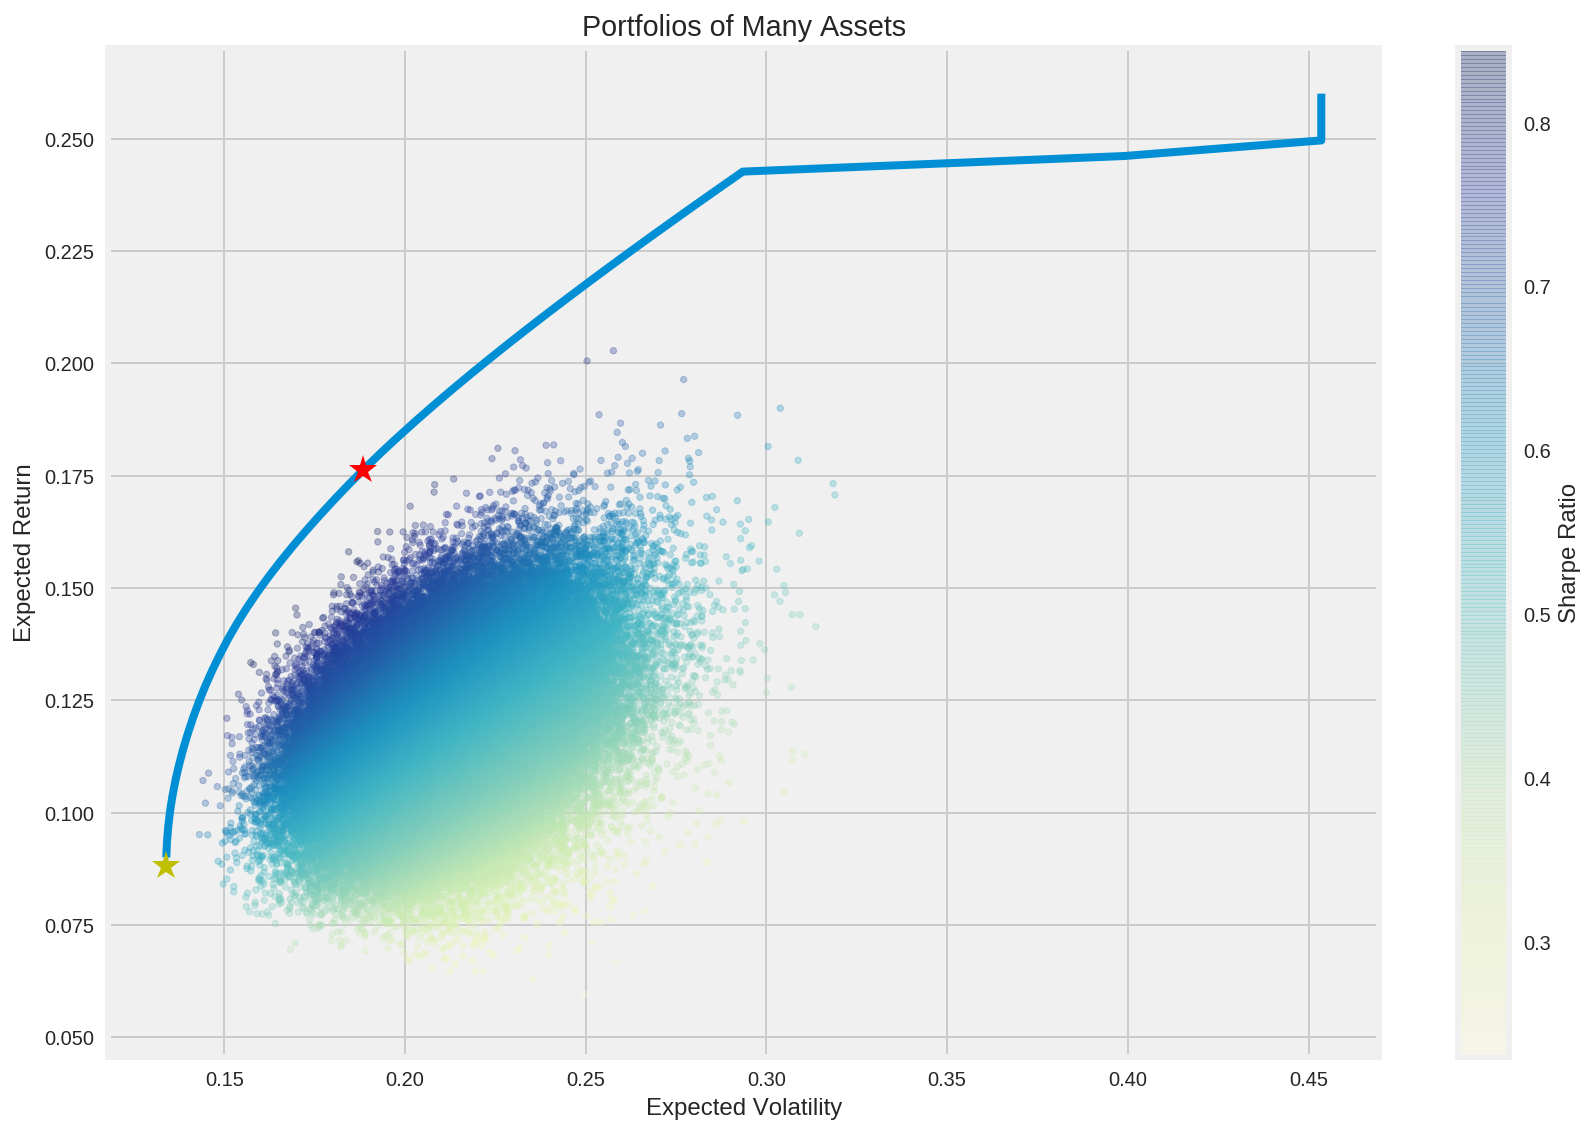

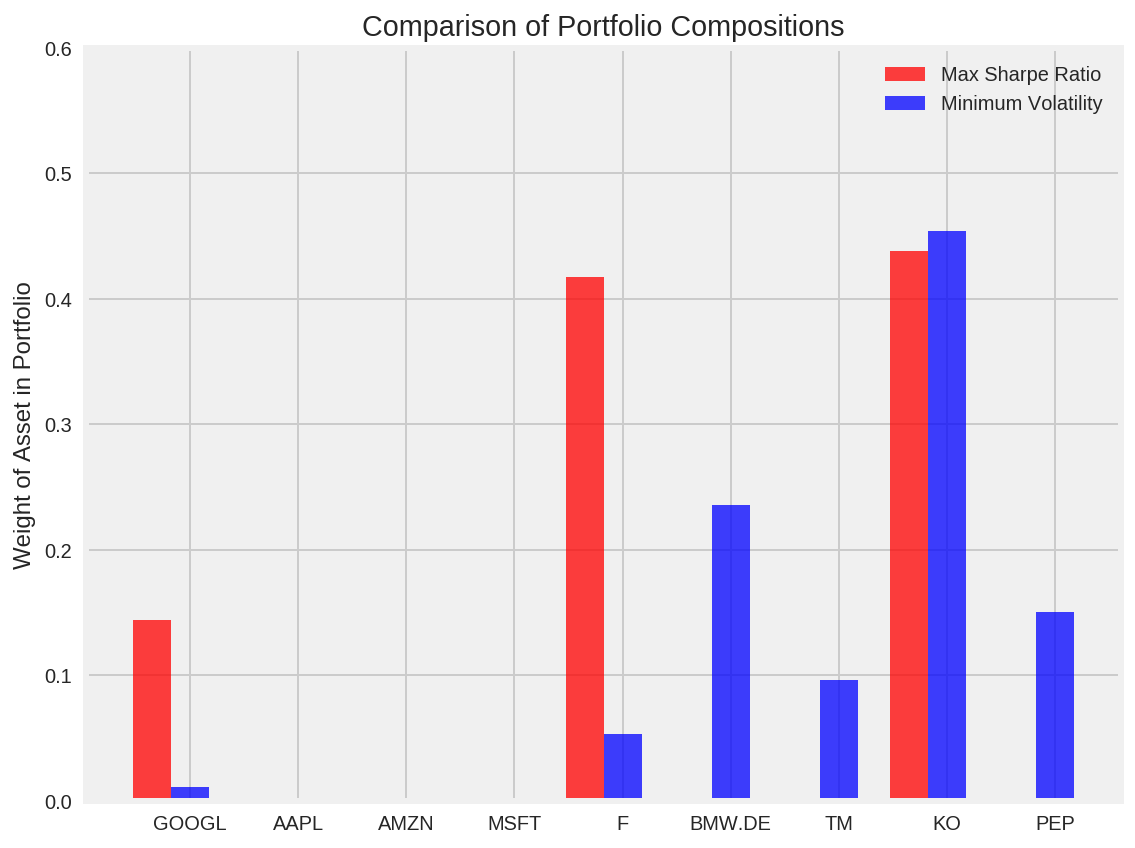

In [ ]:
#Create a new figure
plt.figure(figsize=(12,8))

#Plot results of MC on portfolio weights
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o', s=10, alpha=0.3)

#Find efficient frontier, annual target returns of 9% and 16% are converted to
#match period of mean returns calculated previously
targetReturns = np.linspace(0.09, 0.26, 50)/(252./dur)
efficientPortfolios = findEfficientFrontier(meanDailyReturn, covariance, targetReturns)
plt.plot([p['fun']*np.sqrt(numPeriodsAnnually) for p in efficientPortfolios], targetReturns*numPeriodsAnnually, marker='x')

#Find portfolio with maximum Sharpe ratio
maxSharpe = findMaxSharpeRatioPortfolio(meanDailyReturn, covariance, riskFreeRate)
rp, sdp = calcPortfolioPerf(maxSharpe['x'], meanDailyReturn, covariance)
plt.plot(sdp*np.sqrt(numPeriodsAnnually), rp*numPeriodsAnnually, 'r*', markersize=15.0)

#Find portfolio with minimum variance
minVar = findMinVariancePortfolio(meanDailyReturn, covariance)
rp, sdp = calcPortfolioPerf(minVar['x'], meanDailyReturn, covariance)
plt.plot(sdp*np.sqrt(numPeriodsAnnually), rp*numPeriodsAnnually, 'y*', markersize=15.0)
    
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolios of Many Assets')
plt.tight_layout()
plt.savefig('Monte Carlo Simulation for Portfolio', dpi=300)

#plt.figure(figsize=(8,6))
ind = np.arange(numAssets)
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(ind, maxSharpe['x'], width, color='r', alpha=0.75)
rects2 = ax.bar(ind + width, minVar['x'], width, color='b', alpha=0.75)
ax.set_ylabel('Weight of Asset in Portfolio')
ax.set_ylim(0,0.6)
ax.set_title('Comparison of Portfolio Compositions')
ax.set_xticks(ind + width)
ax.set_xticklabels(stocks)
plt.tight_layout()
ax.legend((rects1[0], rects2[0]), ('Max Sharpe Ratio', 'Minimum Volatility'))
plt.savefig('Portfolio Compositions', dpi=300)
plt.show()